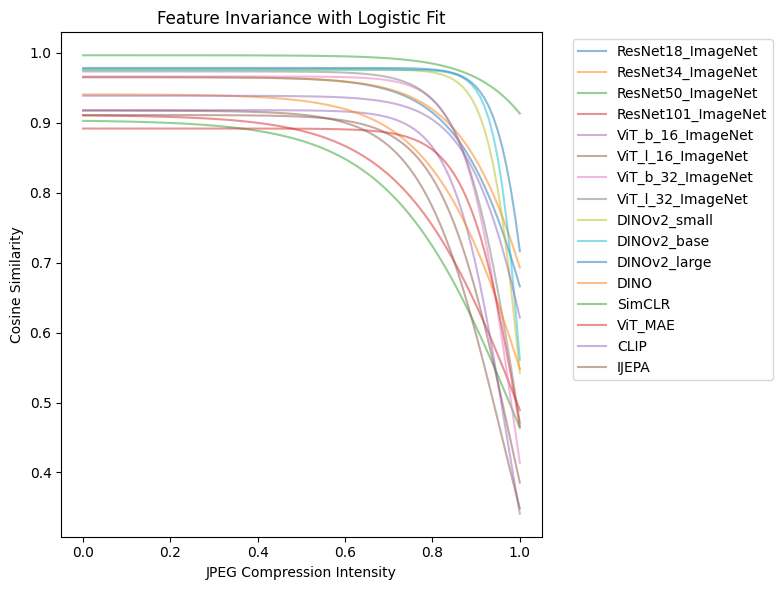

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit


def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))


# List of features for which CSVs are available.
features = [
    "ResNet18_ImageNet",
    "ResNet34_ImageNet",
    "ResNet50_ImageNet",
    "ResNet101_ImageNet",
    "ViT_b_16_ImageNet",
    "ViT_l_16_ImageNet",
    "ViT_b_32_ImageNet",
    "ViT_l_32_ImageNet",
    "DINOv2_small",
    "DINOv2_base",
    "DINOv2_large",
    "DINO",
    "SimCLR",
    "ViT_MAE",
    "CLIP",
    "IJEPA",
]

# Container for each feature's dataframe.
dataframes = {}

# Read each CSV into a dataframe:
for feature in features:
    filename = f"../results/ImageNet_invariance/ImageNet_{feature}_JPEGCompression_feature_distances.csv"
    df = pd.read_csv(filename)
    dataframes[feature] = df

# Assume each CSV has the same 'transform_param' values.
common_x = dataframes[features[0]]["transform_param"]

# Build a dataframe with cosine similarity columns for all features.
cosine_df = pd.DataFrame(
    {feature: dataframes[feature]["cosine_similarity"] for feature in features}
)

# Create the plot with smoothed curves using a logistic fit.
fig, ax = plt.subplots(figsize=(8, 6))
for feature in features:
    x = dataframes[feature]["transform_param"]
    y = dataframes[feature]["cosine_similarity"]
    # Use all data points for the logistic fit.
    # Provide initial guess: L=max(y), k=1, x0=median(x)
    p0 = [y.max(), 1, np.median(x)]
    try:
        params, _ = curve_fit(logistic, x, y, p0=p0)
        x_fit = np.linspace(x.min(), x.max(), 100)
        y_fit = logistic(x_fit, *params)
        ax.plot(x_fit, y_fit, label=feature, alpha=0.5)
    except RuntimeError:
        # In case the fit fails, fallback to plotting the raw data.
        ax.plot(x, y, label=feature, alpha=0.5)

ax.set_xlabel("JPEG Compression Intensity")
ax.set_ylabel("Cosine Similarity")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.set_title("Feature Invariance with Logistic Fit")
plt.tight_layout()
plt.show()